In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Veri setini yükleyin
data = pd.read_csv('parkinsons.data')

In [3]:
# Giriş ve çıkış değişkenlerini ayırın
X = data.drop(columns=['name', 'status'])
y = data['status']

In [4]:
# Veriyi eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Veriyi ölçeklendirin
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Naive Bayes Modeli
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)

In [7]:
# Naive Bayes için rapor ve matrisi alalım
nb_report = classification_report(y_test, y_pred_nb, output_dict=True)
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)

In [8]:
# KNN Modeli
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

In [9]:
# KNN için rapor ve matrisi alalım
knn_report = classification_report(y_test, y_pred_knn, output_dict=True)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)


In [10]:
# Karar Ağaçları Modeli
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

In [11]:
# Karar Ağaçları için rapor ve matrisi alalım
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)


In [12]:
# Raporları DataFrame olarak oluştur
nb_df = pd.DataFrame(nb_report).transpose()
knn_df = pd.DataFrame(knn_report).transpose()
dt_df = pd.DataFrame(dt_report).transpose()

In [13]:
# Tabloyu yazdır
print("Naive Bayes Classification Report:")
print(nb_df)
print("\nKNN Classification Report:")
print(knn_df)
print("\nDecision Tree Classification Report:")
print(dt_df)

Naive Bayes Classification Report:
              precision    recall  f1-score    support
0              0.333333  0.571429  0.421053   7.000000
1              0.888889  0.750000  0.813559  32.000000
accuracy       0.717949  0.717949  0.717949   0.717949
macro avg      0.611111  0.660714  0.617306  39.000000
weighted avg   0.789174  0.717949  0.743109  39.000000

KNN Classification Report:
              precision    recall  f1-score    support
0              1.000000  0.714286  0.833333   7.000000
1              0.941176  1.000000  0.969697  32.000000
accuracy       0.948718  0.948718  0.948718   0.948718
macro avg      0.970588  0.857143  0.901515  39.000000
weighted avg   0.951735  0.948718  0.945221  39.000000

Decision Tree Classification Report:
              precision    recall  f1-score    support
0              0.666667  0.571429  0.615385   7.000000
1              0.909091  0.937500  0.923077  32.000000
accuracy       0.871795  0.871795  0.871795   0.871795
macro avg      0.78

In [14]:
# Grafik çizme
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

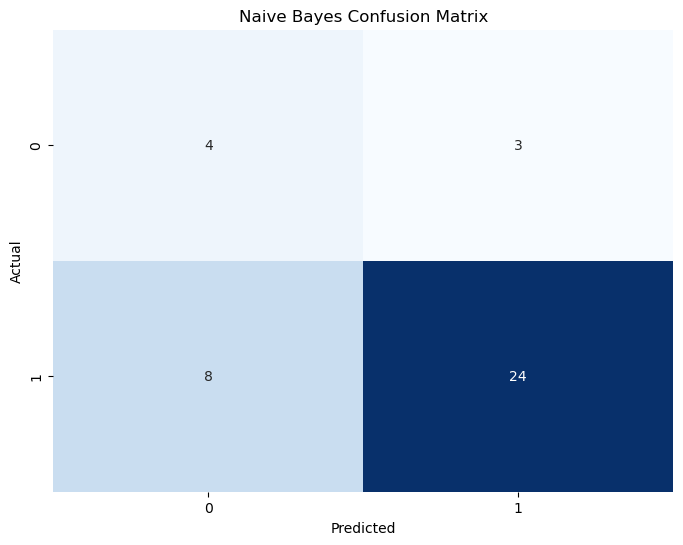

In [15]:
# Naive Bayes için karmaşıklık matrisi
plot_confusion_matrix(nb_conf_matrix, 'Naive Bayes Confusion Matrix')

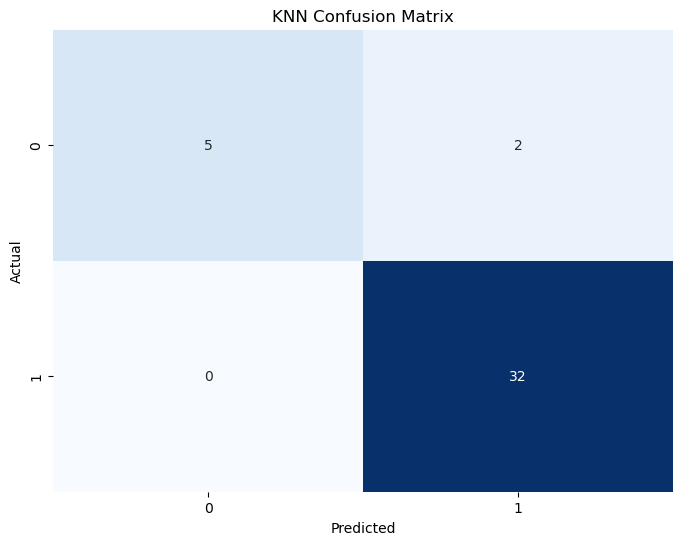

In [16]:
# KNN için karmaşıklık matrisi
plot_confusion_matrix(knn_conf_matrix, 'KNN Confusion Matrix')


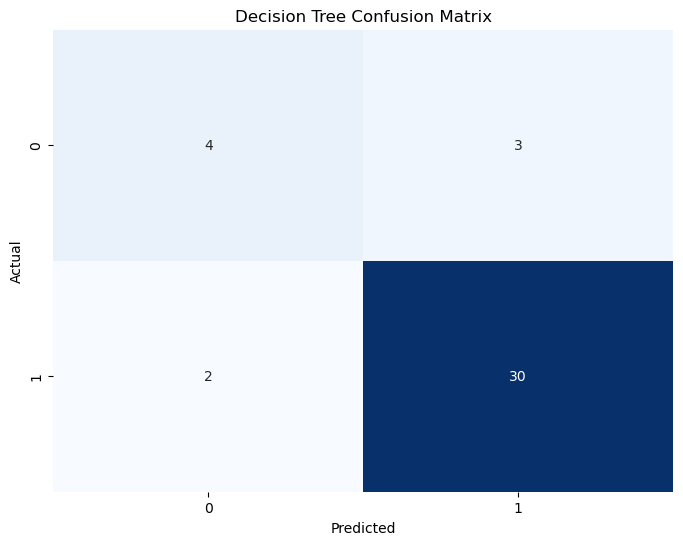

In [17]:
# Karar Ağacı için karmaşıklık matrisi
plot_confusion_matrix(dt_conf_matrix, 'Decision Tree Confusion Matrix')

In [18]:
# Sınıflandırma raporlarını grafik olarak çizme
def plot_classification_report(report, title):
    report_df = pd.DataFrame(report).iloc[:-1, :].T
    report_df.plot(kind='bar', figsize=(12, 6))
    plt.title(title)
    plt.ylim(0, 1.1)
    plt.show()

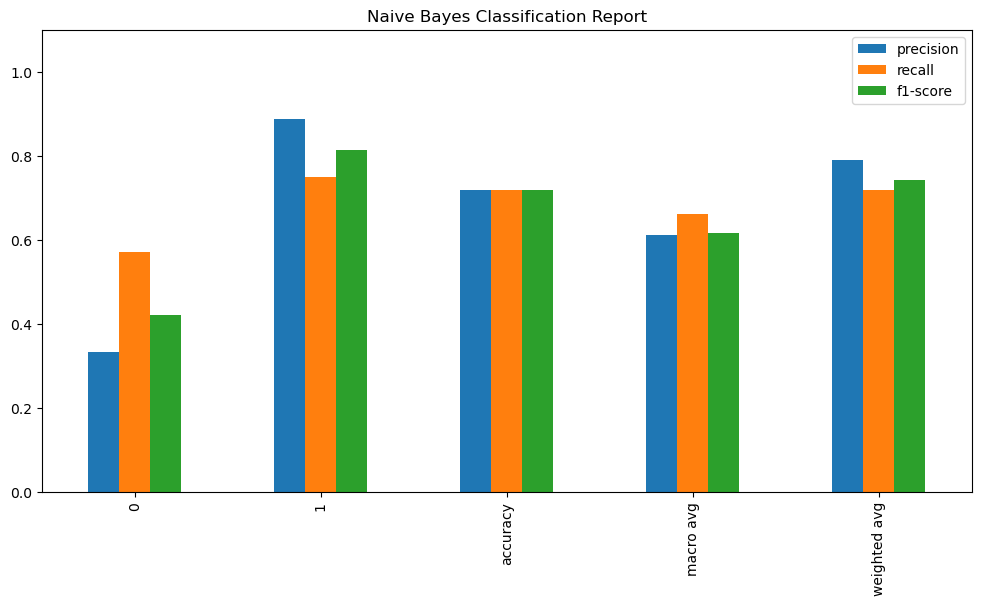

In [19]:
# Naive Bayes için sınıflandırma raporu
plot_classification_report(nb_report, 'Naive Bayes Classification Report')

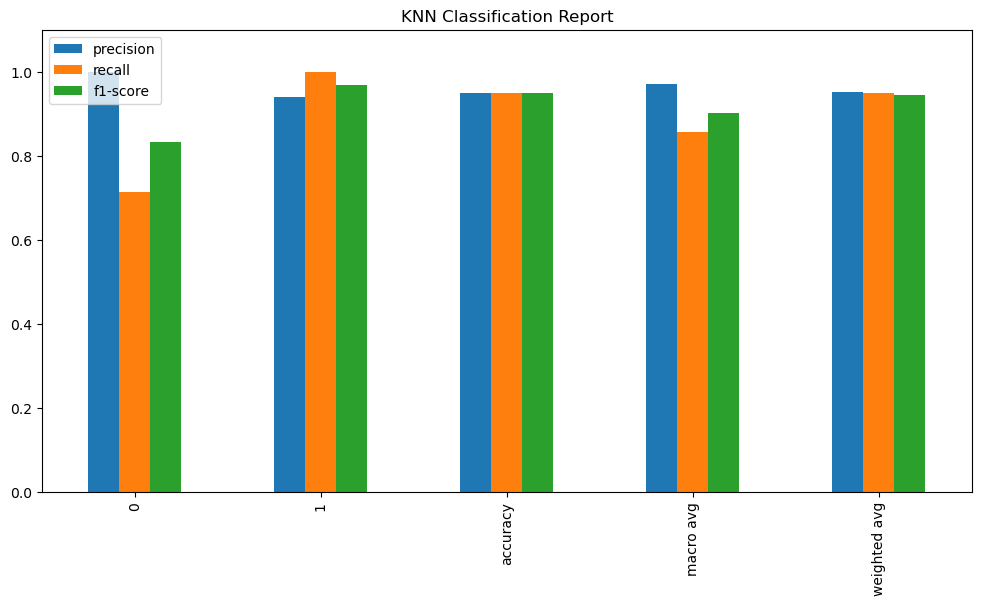

In [20]:
# KNN için sınıflandırma raporu
plot_classification_report(knn_report, 'KNN Classification Report')

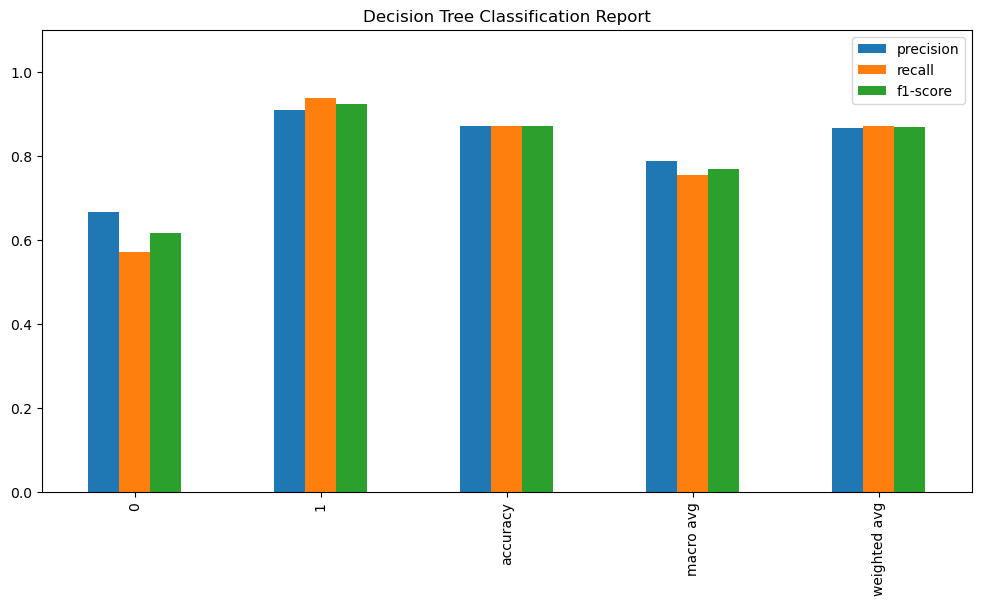

In [21]:
# Karar Ağaçları için sınıflandırma raporu
plot_classification_report(dt_report, 'Decision Tree Classification Report')

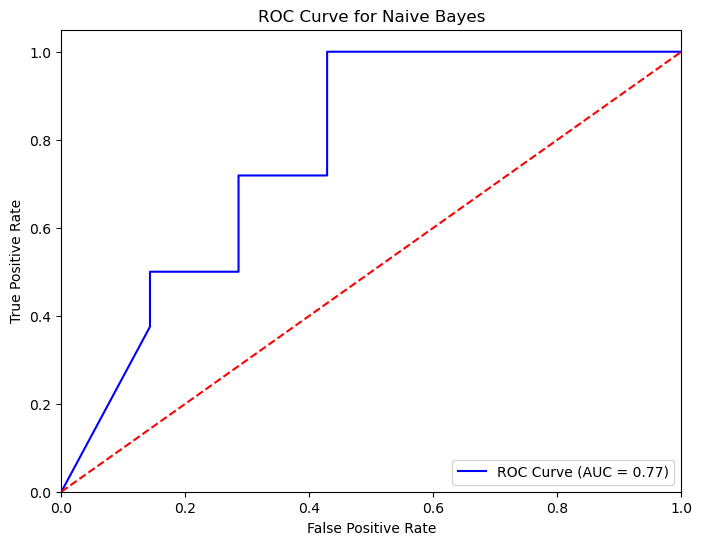

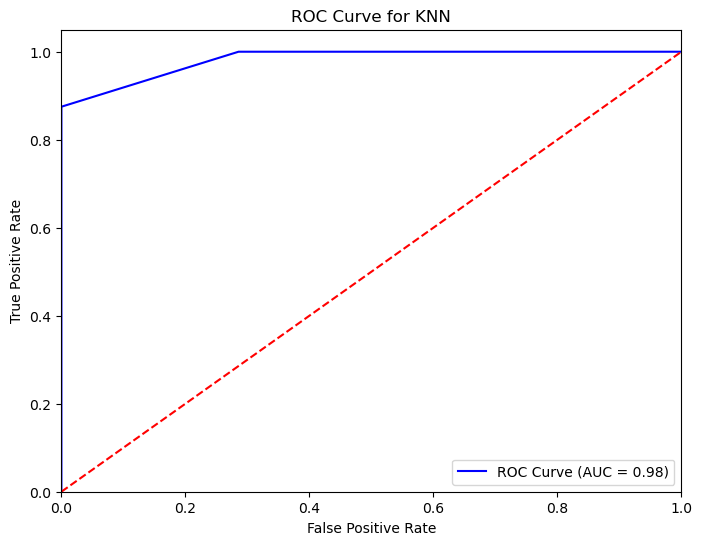

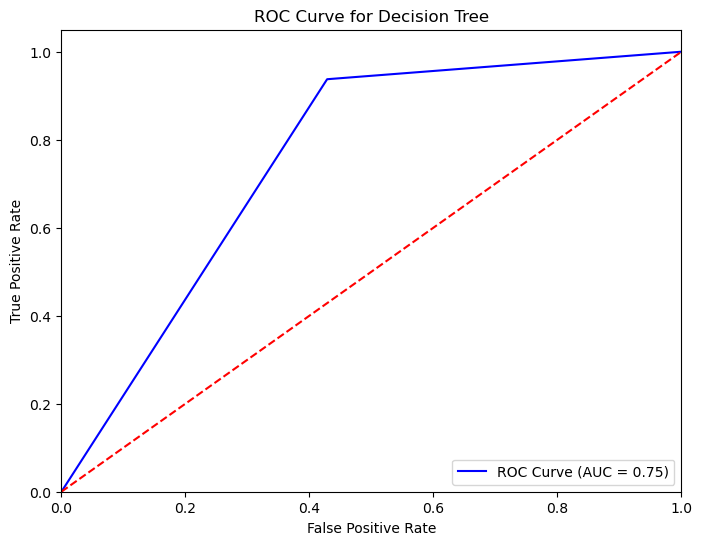

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC ve AUC hesaplama ve çizme fonksiyonu
def plot_roc_auc(y_test, y_pred_prob, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Naive Bayes için ROC ve AUC
y_pred_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]
plot_roc_auc(y_test, y_pred_prob_nb, 'Naive Bayes')

# KNN için ROC ve AUC
y_pred_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
plot_roc_auc(y_test, y_pred_prob_knn, 'KNN')

# Karar Ağaçları için ROC ve AUC
y_pred_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
plot_roc_auc(y_test, y_pred_prob_dt, 'Decision Tree')


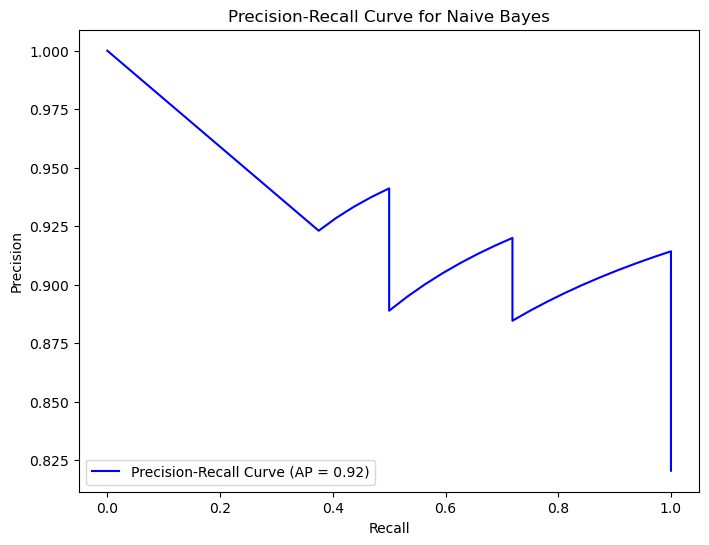

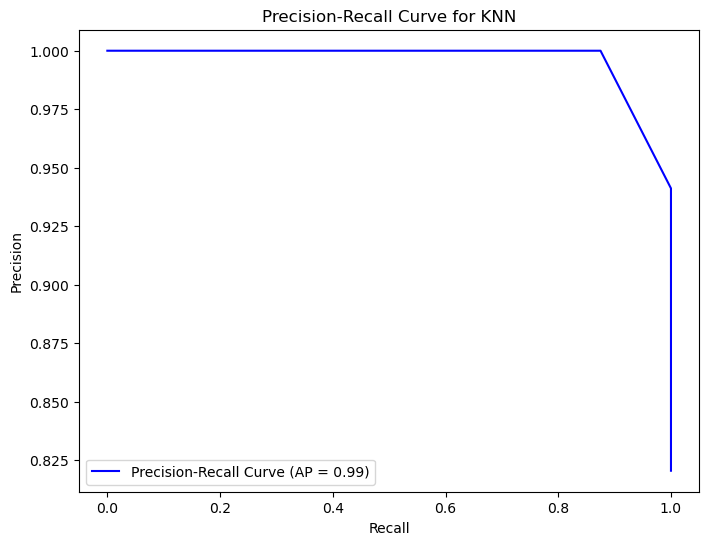

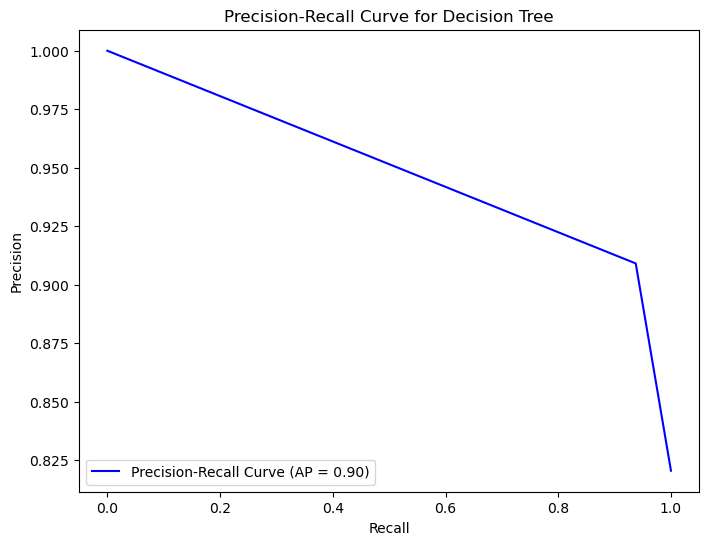

In [23]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall eğrisi ve ortalama precision (AP) hesaplama ve çizme fonksiyonu
def plot_precision_recall(y_test, y_pred_prob, model_name):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    avg_precision = average_precision_score(y_test, y_pred_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', label=f'Precision-Recall Curve (AP = {avg_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.legend(loc='lower left')
    plt.show()

# Naive Bayes için Precision-Recall eğrisi
y_pred_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]
plot_precision_recall(y_test, y_pred_prob_nb, 'Naive Bayes')

# KNN için Precision-Recall eğrisi
y_pred_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
plot_precision_recall(y_test, y_pred_prob_knn, 'KNN')

# Karar Ağaçları için Precision-Recall eğrisi
y_pred_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
plot_precision_recall(y_test, y_pred_prob_dt, 'Decision Tree')


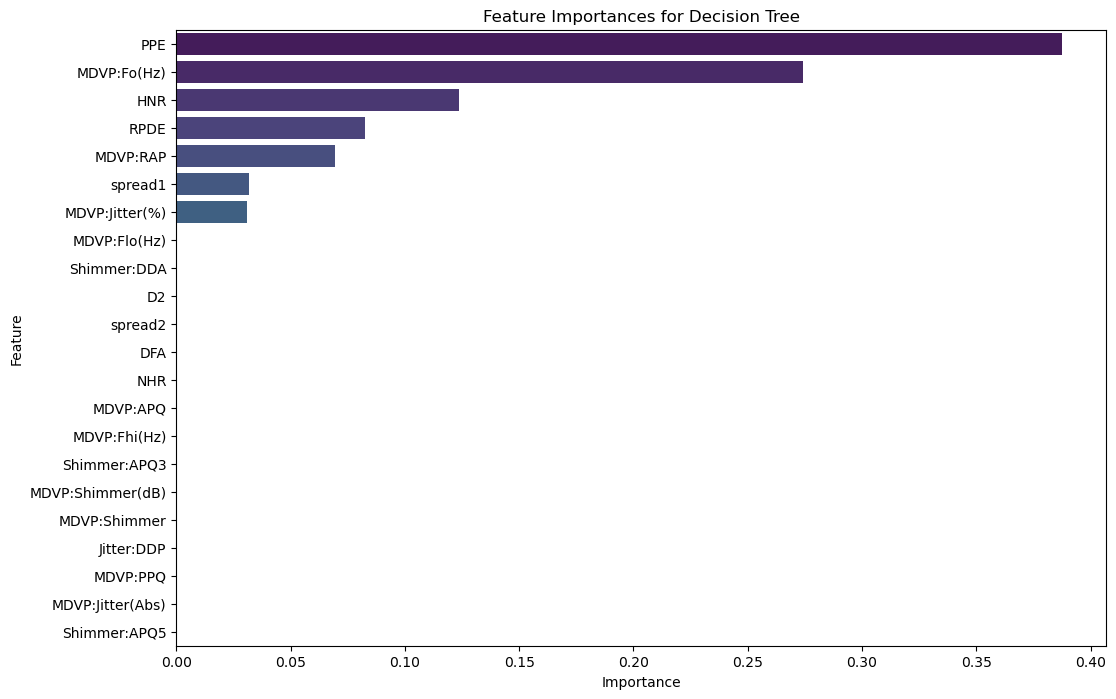

In [24]:
import numpy as np

# Özellik önemini al
feature_importances = dt_model.feature_importances_
feature_names = X.columns

# Özellik önemini DataFrame olarak oluştur
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Özellik önemine göre sıralama
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Özellik önemini görselleştirme
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')
plt.title('Feature Importances for Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mustafa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

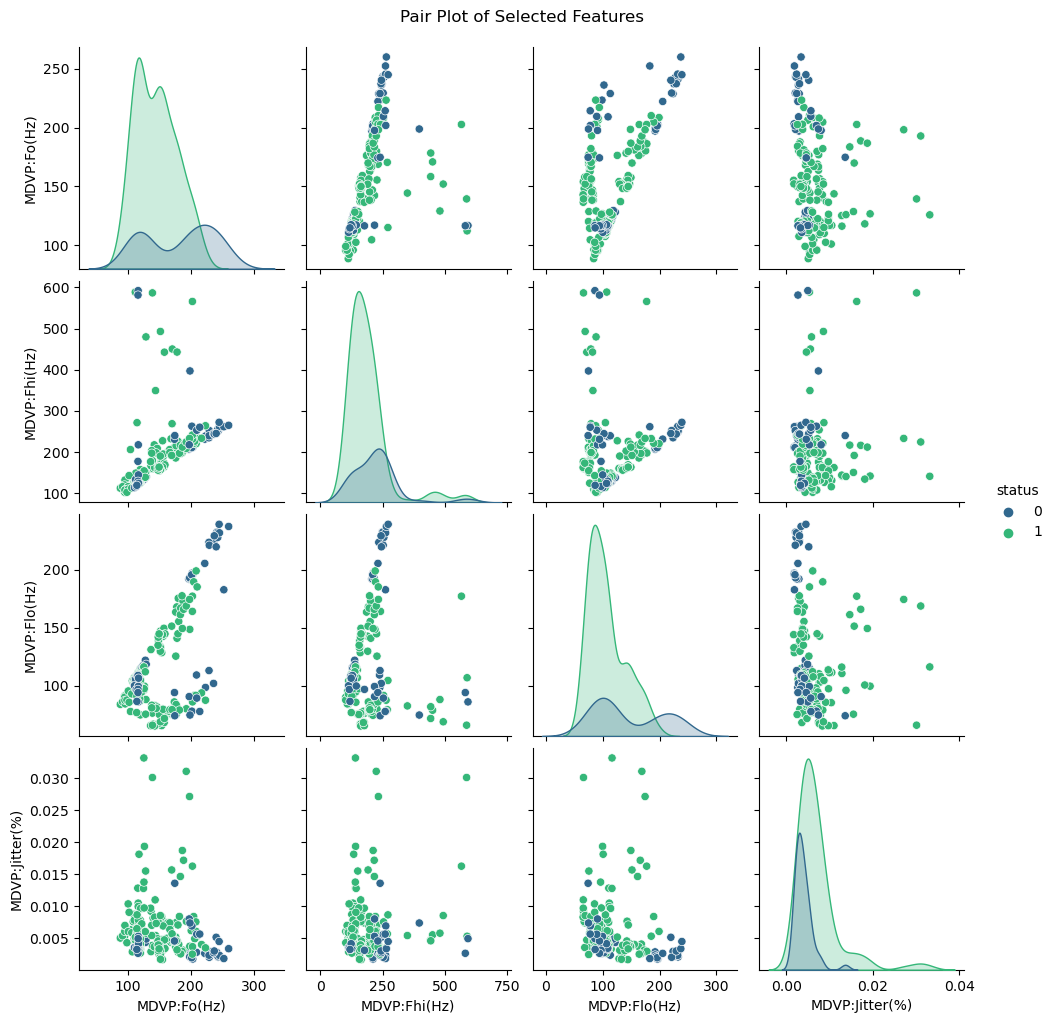

In [25]:
# Gerekli kütüphaneleri yükleyin
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setindeki çok fazla değişken olabilir, bu yüzden ilk birkaç değişkeni alarak bir pair plot oluşturacağız.
# Bunun için veri setinin ilk birkaç sütununu ve 'status' değişkenini alıyoruz.
selected_columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'status']
data_subset = data[selected_columns]

# Pair plot oluştur
sns.pairplot(data_subset, hue='status', diag_kind='kde', palette='viridis')
plt.suptitle('Pair Plot of Selected Features', y=1.02)  # y parametresi başlığın yukarı taşınması için
plt.show()


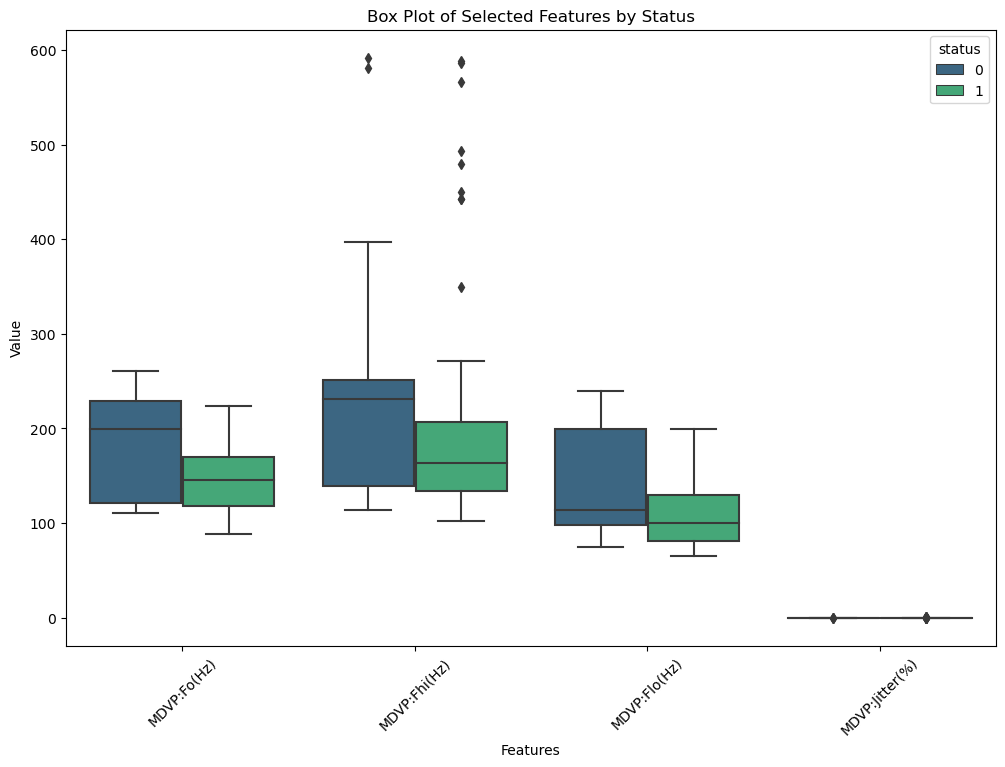

In [26]:
# Gerekli kütüphaneleri yükleyin
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot oluşturmak için seçili sütunlar
selected_columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'status']

# Veri subset'i oluştur
data_subset = data[selected_columns]

# Uzun formatta veriyi melt et (çevir)
data_melted = pd.melt(data_subset, id_vars='status', var_name='Features', value_name='Value')

# Box plot oluştur
plt.figure(figsize=(12, 8))
sns.boxplot(x='Features', y='Value', hue='status', data=data_melted, palette='viridis')
plt.title('Box Plot of Selected Features by Status')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

# KNN performans metrikleri
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

print("KNN Model Performans Metrikleri:")
print(f"Accuracy: {knn_accuracy:.5f}")
print(f"Precision: {knn_precision:.5f}")
print(f"Recall: {knn_recall:.5f}")
print(f"F1-Score: {knn_f1:.5f}")

# Decision Tree performans metrikleri
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("\nDecision Tree Model Performans Metrikleri:")
print(f"Accuracy: {dt_accuracy:.5f}")
print(f"Precision: {dt_precision:.5f}")
print(f"Recall: {dt_recall:.5f}")
print(f"F1-Score: {dt_f1:.5f}")




KNN Model Performans Metrikleri:
Accuracy: 0.94872
Precision: 0.94118
Recall: 1.00000
F1-Score: 0.96970

Decision Tree Model Performans Metrikleri:
Accuracy: 0.87179
Precision: 0.90909
Recall: 0.93750
F1-Score: 0.92308


In [28]:
gnb_accuracy = accuracy_score(y_test, y_pred_nb)
gnb_precision = precision_score(y_test, y_pred_nb)
gnb_recall = recall_score(y_test, y_pred_nb)
gnb_f1 = f1_score(y_test, y_pred_nb)

print("\nGaussianNB Model Performans Metrikleri:")
print(f"Accuracy: {gnb_accuracy:.5f}")
print(f"Precision: {gnb_precision:.5f}")
print(f"Recall: {gnb_recall:.5f}")
print(f"F1-Score: {gnb_f1:.5f}")


GaussianNB Model Performans Metrikleri:
Accuracy: 0.71795
Precision: 0.88889
Recall: 0.75000
F1-Score: 0.81356
